In [119]:
import pandas as pd 
import numpy as np 
import configparser
import os
import seaborn as sns
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
import nltk 

config = configparser.ConfigParser()
config.read("env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
base_path = config['DEFAULT']['base_path']
code_dir = config['DEFAULT']['code_dir']

data_prefix = 'Maha'
out_path = f'{output_dir}/{data_prefix}'
OHCO = ['book_id','chap_id','sec_id', 'para_num', 'sent_num', 'token_num']


os.chdir(code_dir)
import preprocess
import bow_analysis
os.chdir(base_path)

In [120]:
CORPUS = pd.read_csv(fr"{output_dir}\F3\{data_prefix}-CORPUS.csv", sep="|").set_index(OHCO)
LIB = pd.read_csv(fr"{output_dir}\F3\{data_prefix}-LIB.csv", sep="|").set_index(OHCO[:1])
LIB2 = pd.read_csv(fr"{output_dir}\F3\{data_prefix}-LIB2.csv", sep="|").set_index(OHCO[:2])
VOCAB = pd.read_csv(fr"{output_dir}\F3\{data_prefix}-VOCAB.csv", sep="|")
LIB2

chap_name              book_name  \
book_id chap_id                                                 
1       1           Anukramanika Parva              Adi Parva   
        2               Sangraha Parva              Adi Parva   
        3                Paushya Parva              Adi Parva   
        4                Pauloma Parva              Adi Parva   
        5                 Astika Parva              Adi Parva   
...                                ...                    ...   
15      2           Putradarsana Parva     Asramavasika Parva   
        3           Naradagamana Parva     Asramavasika Parva   
16      1                Mausala Parva          Mausala Parva   
17      1        Mahaprasthanika Parva  Mahaprasthanika Parva   
18      1         Svargarohanika Parva   Svargarohanika Parva   

                source_file_path  chap_len  n_secs  n_sents  n_tokens  
book_id chap_id                                                        
1       1             maha01.txt      7511       1      374      7511  
        2             maha01.txt      8655       1      524      8655  
        3             maha01.txt      6137       1      396      6137  
        4             maha01.txt      4661       9      261      4661  
        5             maha01.txt     30619      46     1753     30619  
...                          ...       ...     ...      ...       ...  
15      2             maha15.txt      6789       8      417      6789  
        3             maha15.txt      2551       3      149      2551  
16      1             maha16.txt      8072       7      432      8072  
17      1             maha17.txt      3062       2      206      3062  
18      1             maha18.txt      8628       5      495      8628  

[99 rows x 7 columns]

In [121]:
LIB.sum(axis=0)

source_file_path    maha01.txtmaha02.txtmaha03.txtmaha04.txtmaha05...
raw_title           Adi ParvaSabha ParvaVana ParvaVirata ParvaUdyo...
book_len                                                      2409433
n_chaps                                                            99
n_secs                                                           2089
n_sents                                                        126870
n_tokens                                                      2409433
n_chars                                                      11166915
parva_name          AdiSabhaVanaVirataUdyogaBhishmaDronaKarnaShaly...
timeline            Pre-WarPre-WarPre-WarPre-WarPre-WarWarWarWarWa...
key_focus           Origins, family lineages, childhood of heroesD...
main_theme          lineagepowerphilosophystrategydiplomacydharmas...
broad_theme         MythologyStrategyPhilosophyStrategyPhilosophyP...
dtype: object

In [122]:
LIB2.sum(axis=0)

chap_name           Anukramanika ParvaSangraha ParvaPaushya ParvaP...
book_name           Adi ParvaAdi ParvaAdi ParvaAdi ParvaAdi ParvaA...
source_file_path    maha01.txtmaha01.txtmaha01.txtmaha01.txtmaha01...
chap_len                                                      2409433
n_secs                                                           2089
n_sents                                                        126870
n_tokens                                                      2409433
dtype: object

In [123]:
CORPUS

pos_tuple  \
book_id chap_id sec_id para_num sent_num token_num                            
1       1       1      0        0        1          ('Anukramanika', 'NNP')   
                                         2                 ('Parva', 'NNP')   
                                         4                    ('Om', 'NNP')   
                                1        0                ('Having', 'VBG')   
                                         1                 ('bowed', 'VBN')   
...                                                                     ...   
18      1       5      0        147      25                    ('of', 'IN')   
                                         26               ('Vishnu', 'NNP')   
                                         27                  ('like', 'IN')   
                                         28               ('Vishnu', 'NNP')   
                                         29              ('himself', 'PRP')   

                                                    pos     token_str  \
book_id chap_id sec_id para_num sent_num token_num                      
1       1       1      0        0        1          NNP  Anukramanika   
                                         2          NNP         Parva   
                                         4          NNP            Om   
                                1        0          VBG        Having   
                                         1          VBN         bowed   
...                                                 ...           ...   
18      1       5      0        147      25          IN            of   
                                         26         NNP        Vishnu   
                                         27          IN          like   
                                         28         NNP        Vishnu   
                                         29         PRP       himself   

                                                        term_str pos_group  
book_id chap_id sec_id para_num sent_num token_num                          
1       1       1      0        0        1          anukramanika        NN  
                                         2                 parva        NN  
                                         4                    om        NN  
                                1        0                having        VB  
                                         1                 bowed        VB  
...                                                          ...       ...  
18      1       5      0        147      25                   of        IN  
                                         26               vishnu        NN  
                                         27                 like        IN  
                                         28               vishnu        NN  
                                         29              himself        PR  

[2409433 rows x 5 columns]

In [124]:
chap_bow = bow_analysis.bow_rep(CORPUS, "CHAPS")
chap_bow

n
book_id chap_id term_str        
1       1       a             57
                abhimanyu      2
                abikshit       1
                able           4
                abode          5
...                           ..
18      1       your           5
                yours          1
                yourself       1
                yudhamanyu     1
                yudhishthira  30

[245040 rows x 1 columns]

In [125]:
DTCM = chap_bow.n.unstack(fill_value=0)
DTCM

term_str         01  1  10  100  1000  10000  100000  1001  1002  1003  ...  \
book_id chap_id                                                         ...   
1       1         0  0   0    0     0      0       0     0     0     0  ...   
        2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
        4         0  0   0    0     0      0       0     0     0     0  ...   
        5         0  1   0    0     0      0       0     0     0     0  ...   
...              .. ..  ..  ...   ...    ...     ...   ...   ...   ...  ...   
15      2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
16      1         0  0   0    0     1      0       0     0     0     0  ...   
17      1         0  0   0    0     2      0       0     0     0     0  ...   
18      1         0  0   0    0     1      0       0     0     0     0  ...   

term_str         yuyudhana  yuyudhanas  yuyutshu  yuyutsu  yuyutsus  zeal  \
book_id chap_id                                                             
1       1                1           0         0        0         0     0   
        2                0           0         0        0         0     0   
        3                0           0         0        0         0     0   
        4                0           0         0        0         0     0   
        5                0           0         0        0         0     0   
...                    ...         ...       ...      ...       ...   ...   
15      2                0           0         0        0         0     0   
        3                0           0         0        1         0     0   
16      1                6           0         0        0         0     0   
17      1                0           0         0        2         0     0   
18      1                0           0         0        0         0     0   

term_str         zealously  zenana  zodiac  zone  
book_id chap_id                                   
1       1                0       0       0     0  
        2                0       0       0     0  
        3                0       0       1     0  
        4                0       0       0     0  
        5                0       0       0     0  
...                    ...     ...     ...   ...  
15      2                0       0       0     0  
        3                0       0       0     0  
16      1                0       0       0     0  
17      1                0       0       0     0  
18      1                0       0       0     0  

[99 rows x 30681 columns]

In [126]:
DF = DTCM.astype('bool').sum() 
DF

term_str
01            1
1            12
10            9
100           7
1000         12
             ..
zeal          2
zealously     4
zenana        1
zodiac        2
zone          1
Length: 30681, dtype: int64

In [127]:
TFIDF_dict = bow_analysis.compute_TFIDF(chap_bow, "sum", "standard")

In [128]:
# Collapse the TF, IDF, TFIDF matrices to long-form
TF = TFIDF_dict['TF'].stack().rename("TF")
IDF = TFIDF_dict['IDF']
TFIDF = TFIDF_dict['TFIDF'].stack().rename("TFIDF")

# Merge into one DataFrame
combined = pd.concat([TF, TFIDF], axis=1).reset_index()
combined['IDF'] = combined['term_str'].map(IDF)
combined.sort_values(by="TFIDF", ascending = False)

book_id  chap_id    term_str        TF     TFIDF       IDF
89726          1        3      utanka  0.011080  0.044813  4.044394
1250568        3       12  satyabhama  0.006452  0.026093  4.044394
1610870        4        3     kichaka  0.007797  0.025789  3.307429
1061223        3        6        nala  0.008777  0.025706  2.928917
114732         1        4        ruru  0.007509  0.024836  3.307429
...          ...      ...         ...       ...       ...       ...
1038952        3        5      taunts  0.000000  0.000000  5.629357
1038953        3        5   tautology  0.000000  0.000000  6.629357
1038954        3        5       tawas  0.000000  0.000000  6.629357
1038955        3        5       tawny  0.000000  0.000000  2.044394
3037418       18        1        zone  0.000000  0.000000  6.629357

[3037419 rows x 6 columns]

In [129]:
chap_bow['tf'] = TFIDF_dict['TF'].stack()
chap_bow['tfidf'] = TFIDF_dict['TFIDF'].stack()
agg_tfidf = chap_bow.reset_index().groupby("term_str")\
            .agg({"tfidf":"mean","n":"mean"})

# Merging the Vocab Table to get the Frequently Used POS
agg_tfidf = agg_tfidf.reset_index().merge(VOCAB.reset_index()[['term_str','max_pos','cat_pos']], on="term_str", how='left')

print("Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:")
agg_tfidf.sort_values('tfidf', ascending=False).head(20).reset_index(drop=True)

Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:


term_str     tfidf          n max_pos        cat_pos
0         vimokshana  0.017821   1.000000     NNP        {'NNP'}
1        jayadhratha  0.017821   1.000000     NNP        {'NNP'}
2           upamanyu  0.011673  22.000000     NNP        {'NNP'}
3             kirata  0.010516  10.000000     NNP        {'NNP'}
4            athlete  0.010342   2.000000      JJ   {'JJ', 'NN'}
5         sthulakesa  0.009956   7.000000     NNP        {'NNP'}
6          jatugriha  0.009769  11.000000     NNP        {'NNP'}
7   mountainfestival  0.009390   2.000000      NN         {'NN'}
8          vakavadha  0.009265   8.000000     NNP        {'NNP'}
9          rituparna  0.009187  36.000000     NNP        {'NNP'}
10           paushya  0.009098  10.500000     NNP        {'NNP'}
11    arjunavanavasa  0.008971   6.000000      JJ  {'NNP', 'JJ'}
12            utanka  0.008708  28.333333     NNP  {'VB', 'NNP'}
13        pramadvara  0.008465   7.500000     NNP  {'NNP', 'NN'}
14             ratio  0.008171   3.000000      NN         {'NN'}
15        dasarnakas  0.007824  26.000000     NNP        {'NNP'}
16              exit  0.007796   3.000000      NN         {'NN'}
17       assiduously  0.007709   1.000000      RB         {'RB'}
18            parana  0.007684  10.000000     NNP        {'NNP'}
19        accusation  0.007626   2.000000      NN         {'NN'}

In [130]:
", ".join(list(agg_tfidf.sort_values('tfidf', ascending=False)['term_str'].head(20)))

'vimokshana, jayadhratha, upamanyu, kirata, athlete, sthulakesa, jatugriha, mountainfestival, vakavadha, rituparna, paushya, arjunavanavasa, utanka, pramadvara, ratio, dasarnakas, exit, assiduously, parana, accusation'

In [131]:
chap_bow.to_csv(fr"{output_dir}\CHAP_BOW\{data_prefix}-BOW-CHAPS.csv",sep = "|")
chap_bow

n        tf     tfidf
book_id chap_id term_str                            
1       1       a             57  0.007589  0.000000
                abhimanyu      2  0.000266  0.000368
                abikshit       1  0.000133  0.000883
                able           4  0.000533  0.000135
                abode          5  0.000666  0.000135
...                           ..       ...       ...
18      1       your           5  0.000580  0.000210
                yours          1  0.000116  0.000189
                yourself       1  0.000116  0.000443
                yudhamanyu     1  0.000116  0.000267
                yudhishthira  30  0.003477  0.000260

[245040 rows x 3 columns]

In [132]:
DTCM = chap_bow.n.unstack(fill_value=0)
DTCM.to_csv(fr"{output_dir}\CHAP_BOW\{data_prefix}-DTCM-CHAPS.csv",sep = "|")
DTCM

term_str         01  1  10  100  1000  10000  100000  1001  1002  1003  ...  \
book_id chap_id                                                         ...   
1       1         0  0   0    0     0      0       0     0     0     0  ...   
        2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
        4         0  0   0    0     0      0       0     0     0     0  ...   
        5         0  1   0    0     0      0       0     0     0     0  ...   
...              .. ..  ..  ...   ...    ...     ...   ...   ...   ...  ...   
15      2         0  0   0    0     0      0       0     0     0     0  ...   
        3         0  0   0    0     0      0       0     0     0     0  ...   
16      1         0  0   0    0     1      0       0     0     0     0  ...   
17      1         0  0   0    0     2      0       0     0     0     0  ...   
18      1         0  0   0    0     1      0       0     0     0     0  ...   

term_str         yuyudhana  yuyudhanas  yuyutshu  yuyutsu  yuyutsus  zeal  \
book_id chap_id                                                             
1       1                1           0         0        0         0     0   
        2                0           0         0        0         0     0   
        3                0           0         0        0         0     0   
        4                0           0         0        0         0     0   
        5                0           0         0        0         0     0   
...                    ...         ...       ...      ...       ...   ...   
15      2                0           0         0        0         0     0   
        3                0           0         0        1         0     0   
16      1                6           0         0        0         0     0   
17      1                0           0         0        2         0     0   
18      1                0           0         0        0         0     0   

term_str         zealously  zenana  zodiac  zone  
book_id chap_id                                   
1       1                0       0       0     0  
        2                0       0       0     0  
        3                0       0       1     0  
        4                0       0       0     0  
        5                0       0       0     0  
...                    ...     ...     ...   ...  
15      2                0       0       0     0  
        3                0       0       0     0  
16      1                0       0       0     0  
17      1                0       0       0     0  
18      1                0       0       0     0  

[99 rows x 30681 columns]

In [133]:
TFIDF_dict['TFIDF'].to_csv(fr"{output_dir}\CHAP_BOW\{data_prefix}-TFIDF-CHAPS.csv",sep = "|")
TFIDF_dict['TFIDF']

term_str          01         1   10  100      1000  10000  100000  1001  1002  \
book_id chap_id                                                                 
1       1        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        2        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        3        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        4        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        5        0.0  0.000099  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
...              ...       ...  ...  ...       ...    ...     ...   ...   ...   
15      2        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
        3        0.0  0.000000  0.0  0.0  0.000000    0.0     0.0   0.0   0.0   
16      1        0.0  0.000000  0.0  0.0  0.000377    0.0     0.0   0.0   0.0   
17      1        0.0  0.000000  0.0  0.0  0.001989    0.0     0.0   0.0   0.0   
18      1        0.0  0.000000  0.0  0.0  0.000353    0.0     0.0   0.0   0.0   

term_str         1003  ...  yuyudhana  yuyudhanas  yuyutshu   yuyutsu  \
book_id chap_id        ...                                              
1       1         0.0  ...   0.000223         0.0       0.0  0.000000   
        2         0.0  ...   0.000000         0.0       0.0  0.000000   
        3         0.0  ...   0.000000         0.0       0.0  0.000000   
        4         0.0  ...   0.000000         0.0       0.0  0.000000   
        5         0.0  ...   0.000000         0.0       0.0  0.000000   
...               ...  ...        ...         ...       ...       ...   
15      2         0.0  ...   0.000000         0.0       0.0  0.000000   
        3         0.0  ...   0.000000         0.0       0.0  0.000851   
16      1         0.0  ...   0.001245         0.0       0.0  0.000000   
17      1         0.0  ...   0.000000         0.0       0.0  0.001417   
18      1         0.0  ...   0.000000         0.0       0.0  0.000000   

term_str         yuyutsus  zeal  zealously  zenana    zodiac  zone  
book_id chap_id                                                     
1       1             0.0   0.0        0.0     0.0  0.000000   0.0  
        2             0.0   0.0        0.0     0.0  0.000000   0.0  
        3             0.0   0.0        0.0     0.0  0.000917   0.0  
        4             0.0   0.0        0.0     0.0  0.000000   0.0  
        5             0.0   0.0        0.0     0.0  0.000000   0.0  
...                   ...   ...        ...     ...       ...   ...  
15      2             0.0   0.0        0.0     0.0  0.000000   0.0  
        3             0.0   0.0        0.0     0.0  0.000000   0.0  
16      1             0.0   0.0        0.0     0.0  0.000000   0.0  
17      1             0.0   0.0        0.0     0.0  0.000000   0.0  
18      1             0.0   0.0        0.0     0.0  0.000000   0.0  

[99 rows x 30681 columns]

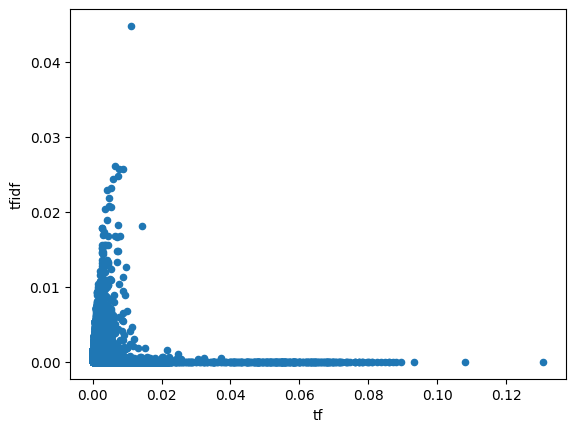

In [134]:
chap_bow.plot.scatter('tf', 'tfidf');

In [135]:
def top_CHAPS_for_term(term_str):
    X = chap_bow.reset_index().merge(LIB2, on=OHCO[:2])
    X = X.merge(LIB, on="book_id")
    print(X.columns)
    
    X = X.query(f"term_str == '{term_str}'").groupby(['chap_id','chap_name','book_id','broad_theme'])\
        .agg({'tfidf':'mean', 'n':'sum', 'tf':'sum'}).sort_values("chap_id")
    return px.scatter(X.reset_index(), 'n','tfidf', 
                      color="broad_theme",
                      size='tf',
                      hover_name='chap_name', 
                      height=500, 
                      width=600, 
                      title=f"{term_str}")

chap_bow.reset_index().merge(LIB2, on=OHCO[:2])

book_id  chap_id      term_str   n        tf     tfidf  \
0             1        1             a  57  0.007589  0.000000   
1             1        1     abhimanyu   2  0.000266  0.000368   
2             1        1      abikshit   1  0.000133  0.000883   
3             1        1          able   4  0.000533  0.000135   
4             1        1         abode   5  0.000666  0.000135   
...         ...      ...           ...  ..       ...       ...   
245035       18        1          your   5  0.000580  0.000210   
245036       18        1         yours   1  0.000116  0.000189   
245037       18        1      yourself   1  0.000116  0.000443   
245038       18        1    yudhamanyu   1  0.000116  0.000267   
245039       18        1  yudhishthira  30  0.003477  0.000260   

                   chap_name             book_name source_file_path  chap_len  \
0         Anukramanika Parva             Adi Parva       maha01.txt      7511   
1         Anukramanika Parva             Adi Parva       maha01.txt      7511   
2         Anukramanika Parva             Adi Parva       maha01.txt      7511   
3         Anukramanika Parva             Adi Parva       maha01.txt      7511   
4         Anukramanika Parva             Adi Parva       maha01.txt      7511   
...                      ...                   ...              ...       ...   
245035  Svargarohanika Parva  Svargarohanika Parva       maha18.txt      8628   
245036  Svargarohanika Parva  Svargarohanika Parva       maha18.txt      8628   
245037  Svargarohanika Parva  Svargarohanika Parva       maha18.txt      8628   
245038  Svargarohanika Parva  Svargarohanika Parva       maha18.txt      8628   
245039  Svargarohanika Parva  Svargarohanika Parva       maha18.txt      8628   

        n_secs  n_sents  n_tokens  
0            1      374      7511  
1            1      374      7511  
2            1      374      7511  
3            1      374      7511  
4            1      374      7511  
...        ...      ...       ...  
245035       5      495      8628  
245036       5      495      8628  
245037       5      495      8628  
245038       5      495      8628  
245039       5      495      8628  

[245040 rows x 13 columns]

In [136]:
top_CHAPS_for_term('kesava')

Index(['book_id', 'chap_id', 'term_str', 'n', 'tf', 'tfidf', 'chap_name',
       'book_name', 'source_file_path_x', 'chap_len', 'n_secs_x', 'n_sents_x',
       'n_tokens_x', 'source_file_path_y', 'raw_title', 'book_len', 'n_chaps',
       'n_secs_y', 'n_sents_y', 'n_tokens_y', 'n_chars', 'parva_name',
       'timeline', 'key_focus', 'main_theme', 'broad_theme'],
      dtype='object')


In [137]:
BOOL = DTCM.astype('bool')
DF = BOOL.sum()
BOOL_TFIDF = TFIDF_dict['TF'] * TFIDF_dict['IDF']
DOC = pd.DataFrame(index=DTCM.index)
DOC['book_chap_sig_bool'] = BOOL_TFIDF.T.mean()
DOC['book_chap_sig'] = TFIDF_dict['TFIDF'].T.mean()
DOC['n_tokens'] = DTCM.sum(1)
DOC

book_chap_sig_bool  book_chap_sig  n_tokens
book_id chap_id                                             
1       1                  0.000025       0.000025      7511
        2                  0.000025       0.000025      8655
        3                  0.000023       0.000023      6137
        4                  0.000023       0.000023      4661
        5                  0.000020       0.000020     30619
...                             ...            ...       ...
15      2                  0.000014       0.000014      6789
        3                  0.000015       0.000015      2551
16      1                  0.000019       0.000019      8072
17      1                  0.000013       0.000013      3062
18      1                  0.000018       0.000018      8628

[99 rows x 3 columns]

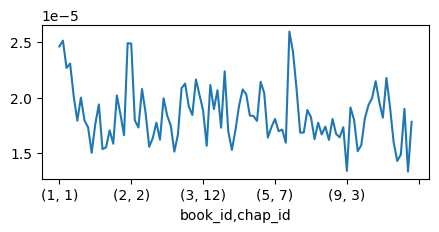

In [138]:
DOC.book_chap_sig.plot.line(figsize=(5,2));

In [139]:
import plotly.graph_objects as go

def plot_sig_docs2(book_id, type='scatter', use_bool=True):

    global DOC
    
    sig_col = "book_chap_sig" + "_bool" * use_bool
    print(sig_col)
    
    D = DOC.loc[book_id]
    title = LIB2.loc[book_id].book_name.iloc[0]
    point_size = (D.n_tokens / D.n_tokens.sum()) * 700
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=D.index, y=D[sig_col], 
                             text=D.index, 
                             mode = 'lines+markers+text',
                             marker = dict(size=point_size, color='#BBB'),
                             line = dict(color='#DADADA'),
                             textfont = dict(color="black")
                            ))
                  
    fig.update_layout(
        font = dict(color="#000", size=14),
        title=title,
        xaxis_title="Chapter",
        yaxis_title="Significance",
        height=800
    )
    fig.show()

def plot_n_sig(book_id, use_bool=True):
    sig_col = "book_chap_sig" + "_bool" * use_bool
    ax = DOC.loc[book_id].plot.scatter('n_tokens', sig_col, title=f"{LIB2.loc[book_id, 'book_name'].iloc[0]}");
    DOC.loc[book_id].apply(lambda row: ax.text(row.n_tokens, row[sig_col], f"  {row.name}"), axis=1)

plot_sig_docs2(1)

book_chap_sig_bool


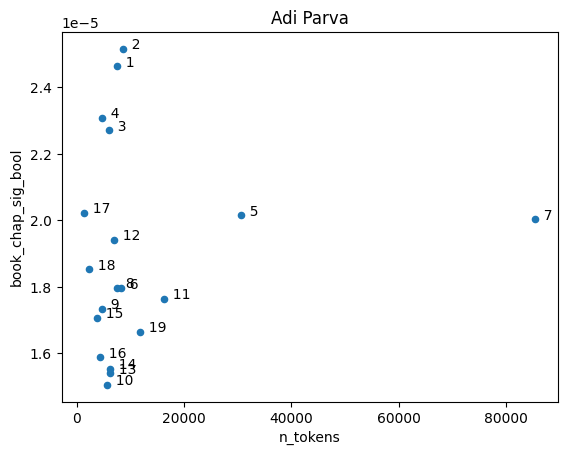

In [140]:
plot_n_sig(1);

In [141]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB["idf"] = VOCAB["term_str"].map(TFIDF_dict['IDF'])
VOCAB['dp'] = VOCAB.df / len(DTCM)
VOCAB['di'] = np.log2(1/VOCAB.dp)
VOCAB['dh'] = VOCAB.dp * VOCAB.di

VOCAB['tfidf_mean'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].mean())
VOCAB['tfidf_sum'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].sum())


In [142]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150354e-07  21.200262  2.409433e+06   
1              1  15        1  6.225531e-06  17.293372  1.606289e+05   
2             10   9        2  3.735319e-06  18.030337  2.677148e+05   
3            100   9        3  3.735319e-06  18.030337  2.677148e+05   
4           1000  41        4  1.701645e-05  15.842710  5.876666e+04   
...          ...  ..      ...           ...        ...           ...   
30677       zeal   2        4  8.300708e-07  20.200262  1.204716e+06   
30678  zealously   4        9  1.660142e-06  19.200262  6.023582e+05   
30679     zenana   1        6  4.150354e-07  21.200262  2.409433e+06   
30680     zodiac   2        6  8.300708e-07  20.200262  1.204716e+06   
30681       zone   1        4  4.150354e-07  21.200262  2.409433e+06   

              h  stop stem_porter stem_snowball  ... cat_pos_group n_pos  \
0      0.000009     0          01            01  ...        {'CD'}     1   
1      0.000108     0           1             1  ...        {'CD'}     1   
2      0.000067     0          10            10  ...        {'CD'}     1   
3      0.000067     0         100           100  ...        {'CD'}     1   
4      0.000270     0        1000          1000  ...        {'CD'}     1   
...         ...   ...         ...           ...  ...           ...   ...   
30677  0.000017     0        zeal          zeal  ...        {'NN'}     1   
30678  0.000032     0     zealous       zealous  ...        {'RB'}     1   
30679  0.000009     0      zenana        zenana  ...        {'NN'}     1   
30680  0.000017     0      zodiac        zodiac  ...        {'NN'}     1   
30681  0.000009     0        zone          zone  ...        {'NN'}     1   

       cat_pos    df       idf        dp        di        dh    tfidf_mean  \
0       {'CD'}   1.0  6.629357  0.010101  6.629357  0.066963  2.544436e-07   
1       {'CD'}  12.0  3.044394  0.121212  3.044394  0.369017  2.026780e-05   
2       {'CD'}   9.0  3.459432  0.090909  3.459432  0.314494  1.559282e-05   
3       {'CD'}   7.0  3.822002  0.070707  3.822002  0.270243  7.185105e-06   
4       {'CD'}  12.0  3.044394  0.121212  3.044394  0.369017  6.441742e-05   
...        ...   ...       ...       ...       ...       ...           ...   
30677   {'NN'}   2.0  5.629357  0.020202  5.629357  0.113724  3.417086e-06   
30678   {'RB'}   4.0  4.629357  0.040404  4.629357  0.187045  8.618871e-06   
30679   {'NN'}   1.0  6.629357  0.010101  6.629357  0.066963  5.775179e-06   
30680  {'NNP'}   2.0  5.629357  0.020202  5.629357  0.113724  1.183168e-05   
30681   {'NN'}   1.0  6.629357  0.010101  6.629357  0.066963  1.768659e-06   

       tfidf_sum  
0       0.000025  
1       0.002007  
2       0.001544  
3       0.000711  
4       0.006377  
...          ...  
30677   0.000338  
30678   0.000853  
30679   0.000572  
30680   0.001171  
30681   0.000175  

[30682 rows x 24 columns]

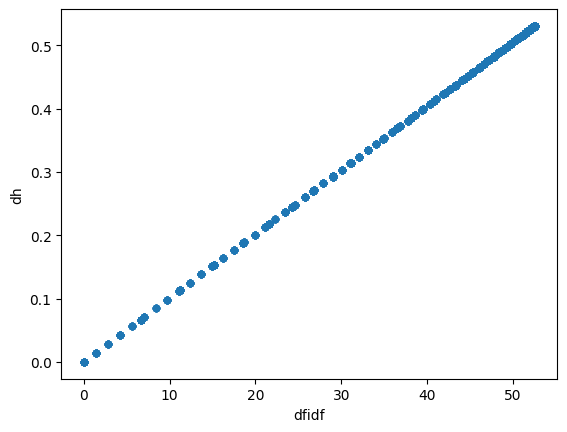

In [143]:
VOCAB['dfidf'] = VOCAB.df * VOCAB.idf
VOCAB.plot.scatter('dfidf', 'dh');

In [144]:
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150354e-07  21.200262  2.409433e+06   
1              1  15        1  6.225531e-06  17.293372  1.606289e+05   
2             10   9        2  3.735319e-06  18.030337  2.677148e+05   
3            100   9        3  3.735319e-06  18.030337  2.677148e+05   
4           1000  41        4  1.701645e-05  15.842710  5.876666e+04   
...          ...  ..      ...           ...        ...           ...   
30677       zeal   2        4  8.300708e-07  20.200262  1.204716e+06   
30678  zealously   4        9  1.660142e-06  19.200262  6.023582e+05   
30679     zenana   1        6  4.150354e-07  21.200262  2.409433e+06   
30680     zodiac   2        6  8.300708e-07  20.200262  1.204716e+06   
30681       zone   1        4  4.150354e-07  21.200262  2.409433e+06   

              h  stop stem_porter stem_snowball  ... n_pos  cat_pos    df  \
0      0.000009     0          01            01  ...     1   {'CD'}   1.0   
1      0.000108     0           1             1  ...     1   {'CD'}  12.0   
2      0.000067     0          10            10  ...     1   {'CD'}   9.0   
3      0.000067     0         100           100  ...     1   {'CD'}   7.0   
4      0.000270     0        1000          1000  ...     1   {'CD'}  12.0   
...         ...   ...         ...           ...  ...   ...      ...   ...   
30677  0.000017     0        zeal          zeal  ...     1   {'NN'}   2.0   
30678  0.000032     0     zealous       zealous  ...     1   {'RB'}   4.0   
30679  0.000009     0      zenana        zenana  ...     1   {'NN'}   1.0   
30680  0.000017     0      zodiac        zodiac  ...     1  {'NNP'}   2.0   
30681  0.000009     0        zone          zone  ...     1   {'NN'}   1.0   

            idf        dp        di        dh    tfidf_mean  tfidf_sum  \
0      6.629357  0.010101  6.629357  0.066963  2.544436e-07   0.000025   
1      3.044394  0.121212  3.044394  0.369017  2.026780e-05   0.002007   
2      3.459432  0.090909  3.459432  0.314494  1.559282e-05   0.001544   
3      3.822002  0.070707  3.822002  0.270243  7.185105e-06   0.000711   
4      3.044394  0.121212  3.044394  0.369017  6.441742e-05   0.006377   
...         ...       ...       ...       ...           ...        ...   
30677  5.629357  0.020202  5.629357  0.113724  3.417086e-06   0.000338   
30678  4.629357  0.040404  4.629357  0.187045  8.618871e-06   0.000853   
30679  6.629357  0.010101  6.629357  0.066963  5.775179e-06   0.000572   
30680  5.629357  0.020202  5.629357  0.113724  1.183168e-05   0.001171   
30681  6.629357  0.010101  6.629357  0.066963  1.768659e-06   0.000175   

           dfidf  
0       6.629357  
1      36.532729  
2      31.134885  
3      26.754012  
4      36.532729  
...          ...  
30677  11.258713  
30678  18.517426  
30679   6.629357  
30680  11.258713  
30681   6.629357  

[30682 rows x 25 columns]

In [145]:
VOCAB.sample(25).sort_values('dh', ascending=False)[['term_str','max_pos', 'tfidf_mean', 'dh']].head(15)\
    .style.background_gradient(cmap='YlGnBu')

In [146]:
a = VOCAB[VOCAB['term_str'].str.startswith('d')==True]

px.scatter(a.reset_index(), x='i', y='tfidf_mean', 
           hover_name='term_str', hover_data=['n'], color='max_pos', 
           log_x=False, log_y=False, height=500, width=500)

In [147]:
px.scatter(VOCAB.reset_index(), x='i', y='dh', 
           hover_name='term_str', hover_data=['n'], 
           color='max_pos', height=500, width=800)

In [148]:
BOOK = CORPUS.loc[6].copy()

TTM = pd.get_dummies(['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'

In [149]:
TTM = pd.get_dummies(BOOK['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'
TTM = TTM.astype('int')
cfg = {'figsize': (20,1)}

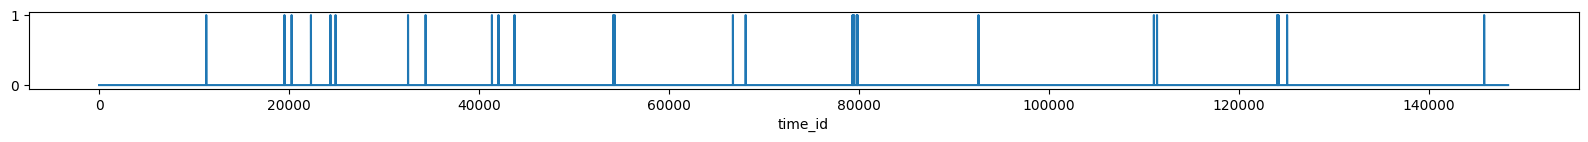

In [150]:
TTM['kesava'].plot(**cfg);

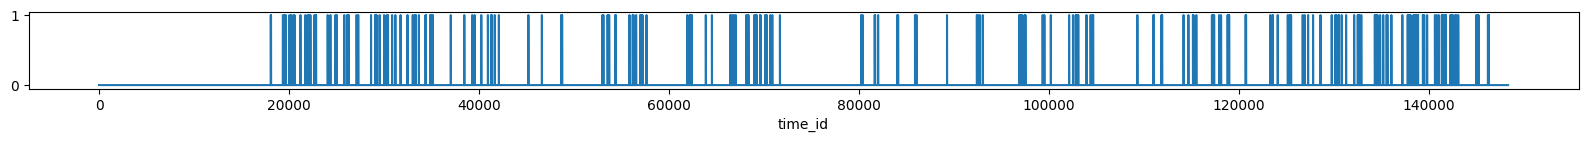

In [151]:
TTM['arjuna'].plot(**cfg);

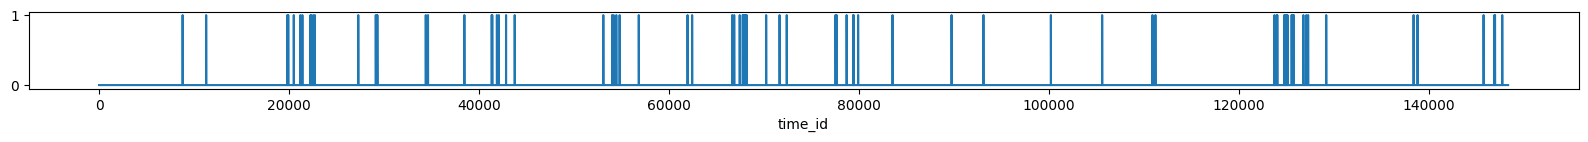

In [152]:
TTM['krishna'].plot(**cfg);

In [153]:
VOCAB.dh.describe()

count    30681.000000
mean         0.180276
std          0.145670
min          0.000000
25%          0.066963
50%          0.113724
75%          0.245115
max          0.530702
Name: dh, dtype: float64

In [154]:
thresh = VOCAB.dh.quantile(.9).round(3)
thresh

0.447

In [155]:
VOCAB2 = VOCAB.sort_values("n", ascending = False).reset_index().rename_axis("term_rank").reset_index().set_index("term_str")
VOCAB2.term_rank = VOCAB2.term_rank+1

SIGS = VOCAB2[VOCAB2.dh > thresh]
len(SIGS)

3101

In [156]:
SIGS.loc[SIGS.max_pos_group == 'NN'].sort_values('dh', ascending=False)[['term_rank', 'n', 'max_pos', 'df', 'dh']].head(10)

term_rank    n max_pos    df        dh
term_str                                          
shelter          2270   92      NN  36.0  0.530702
intent           2169   98      NN  36.0  0.530702
honours          1294  191     NNS  36.0  0.530702
conclusion       1870  118      NN  36.0  0.530702
appearance       1777  127      NN  36.0  0.530702
valour           1755  129      NN  36.0  0.530702
effulgent        2120  101      NN  36.0  0.530702
kindness         2057  105      NN  36.0  0.530702
sala             2653   73     NNP  36.0  0.530702
hymns            1927  115      NN  36.0  0.530702

In [157]:
SIGS[['max_pos', 'n', 'i', 'dh']].head(25).style.background_gradient(cmap='YlGnBu')

In [ ]:
TFIDF_reduced = TFIDF_dict['TFIDF'][SIGS.index]
TFIDF_reduced.to_csv(fr"{output_dir}\CHAP_BOW\{data_prefix}-TFIDF_REDUCED_CHAPS.csv",sep = "|")
TFIDF_reduced

term_str           shafts   pierced      army   deities  carwarriors  \
book_id chap_id                                                        
1       1        0.000000  0.000339  0.000547  0.000000     0.000000   
        2        0.000000  0.000098  0.000570  0.000139     0.000000   
        3        0.000000  0.000000  0.000000  0.000196     0.000000   
        4        0.000000  0.000182  0.000000  0.000000     0.000000   
        5        0.000000  0.000194  0.000000  0.000314     0.000000   
...                   ...       ...       ...       ...          ...   
15      2        0.000000  0.000000  0.000000  0.002658     0.000163   
        3        0.000312  0.000000  0.000000  0.000000     0.000000   
16      1        0.000888  0.000210  0.000000  0.000596     0.001233   
17      1        0.000000  0.000000  0.000000  0.003143     0.000000   
18      1        0.000000  0.000000  0.000000  0.003207     0.000641   

term_str           troops   sanjaya       cut  penances    partha  ...  \
book_id chap_id                                                    ...   
1       1        0.000000  0.012707  0.000000  0.000000  0.000000  ...   
        2        0.000760  0.000755  0.000000  0.000000  0.000000  ...   
        3        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        4        0.000000  0.000000  0.000000  0.000435  0.000000  ...   
        5        0.000000  0.000000  0.000161  0.000961  0.000000  ...   
...                   ...       ...       ...       ...       ...  ...   
15      2        0.000363  0.000000  0.000000  0.003736  0.000000  ...   
        3        0.000000  0.006663  0.000000  0.001989  0.000000  ...   
16      1        0.000204  0.000000  0.000000  0.000503  0.000840  ...   
17      1        0.000000  0.000000  0.000000  0.000663  0.000277  ...   
18      1        0.000000  0.000000  0.000114  0.000470  0.000000  ...   

term_str         apartment   anguish    thorn  cheered    across  believing  \
book_id chap_id                                                               
1       1         0.000000  0.000317  0.00000      0.0  0.000000        0.0   
        2         0.000000  0.000000  0.00000      0.0  0.000284        0.0   
        3         0.000000  0.000000  0.00000      0.0  0.000000        0.0   
        4         0.001055  0.000000  0.00000      0.0  0.000528        0.0   
        5         0.000000  0.000000  0.00008      0.0  0.000080        0.0   
...                    ...       ...      ...      ...       ...        ...   
15      2         0.000000  0.000000  0.00000      0.0  0.000000        0.0   
        3         0.000000  0.000000  0.00000      0.0  0.000000        0.0   
16      1         0.000000  0.000000  0.00000      0.0  0.000000        0.0   
17      1         0.000000  0.000000  0.00000      0.0  0.000000        0.0   
18      1         0.000000  0.000000  0.00000      0.0  0.000000        0.0   

term_str            tops  pressing       hid    affair  
book_id chap_id                                         
1       1        0.00000   0.00000  0.000000  0.000000  
        2        0.00000   0.00000  0.000000  0.000000  
        3        0.00000   0.00000  0.000000  0.000000  
        4        0.00000   0.00000  0.000000  0.000528  
        5        0.00008   0.00008  0.000078  0.000000  
...                  ...       ...       ...       ...  
15      2        0.00000   0.00000  0.000000  0.000000  
        3        0.00000   0.00000  0.000000  0.000000  
16      1        0.00000   0.00000  0.000000  0.000000  
17      1        0.00000   0.00000  0.000000  0.000000  
18      1        0.00000   0.00000  0.000000  0.000000  

[99 rows x 3101 columns]

In [159]:
TFIDF_SIGS_L2 = pd.DataFrame(normalize(TFIDF_reduced, norm='l2', axis=1), 
                             columns=TFIDF_reduced.columns, 
                             index=TFIDF_reduced.index)
TFIDF_SIGS_L2

term_str           shafts   pierced      army   deities  carwarriors  \
book_id chap_id                                                        
1       1        0.000000  0.017973  0.029036  0.000000     0.000000   
        2        0.000000  0.006433  0.037415  0.009127     0.000000   
        3        0.000000  0.000000  0.000000  0.013719     0.000000   
        4        0.000000  0.009412  0.000000  0.000000     0.000000   
        5        0.000000  0.020085  0.000000  0.032567     0.000000   
...                   ...       ...       ...       ...          ...   
15      2        0.000000  0.000000  0.000000  0.225609     0.013824   
        3        0.017517  0.000000  0.000000  0.000000     0.000000   
16      1        0.062061  0.014684  0.000000  0.041665     0.086164   
17      1        0.000000  0.000000  0.000000  0.201509     0.000000   
18      1        0.000000  0.000000  0.000000  0.295938     0.059131   

term_str           troops   sanjaya       cut  penances    partha  ...  \
book_id chap_id                                                    ...   
1       1        0.000000  0.674271  0.000000  0.000000  0.000000  ...   
        2        0.049887  0.049592  0.000000  0.000000  0.000000  ...   
        3        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        4        0.000000  0.000000  0.000000  0.022523  0.000000  ...   
        5        0.000000  0.000000  0.016673  0.099564  0.000000  ...   
...                   ...       ...       ...       ...       ...  ...   
15      2        0.030829  0.000000  0.000000  0.317118  0.000000  ...   
        3        0.000000  0.373813  0.000000  0.111578  0.000000  ...   
16      1        0.014233  0.000000  0.000000  0.035139  0.058734  ...   
17      1        0.000000  0.000000  0.000000  0.042486  0.017754  ...   
18      1        0.000000  0.000000  0.010540  0.043406  0.000000  ...   

term_str         apartment   anguish     thorn  cheered    across  believing  \
book_id chap_id                                                                
1       1         0.000000  0.016824  0.000000      0.0  0.000000        0.0   
        2         0.000000  0.000000  0.000000      0.0  0.018658        0.0   
        3         0.000000  0.000000  0.000000      0.0  0.000000        0.0   
        4         0.054594  0.000000  0.000000      0.0  0.027297        0.0   
        5         0.000000  0.000000  0.008322      0.0  0.008322        0.0   
...                    ...       ...       ...      ...       ...        ...   
15      2         0.000000  0.000000  0.000000      0.0  0.000000        0.0   
        3         0.000000  0.000000  0.000000      0.0  0.000000        0.0   
16      1         0.000000  0.000000  0.000000      0.0  0.000000        0.0   
17      1         0.000000  0.000000  0.000000      0.0  0.000000        0.0   
18      1         0.000000  0.000000  0.000000      0.0  0.000000        0.0   

term_str             tops  pressing       hid    affair  
book_id chap_id                                          
1       1        0.000000  0.000000  0.000000  0.000000  
        2        0.000000  0.000000  0.000000  0.000000  
        3        0.000000  0.000000  0.000000  0.000000  
        4        0.000000  0.000000  0.000000  0.027297  
        5        0.008322  0.008322  0.008058  0.000000  
...                   ...       ...       ...       ...  
15      2        0.000000  0.000000  0.000000  0.000000  
        3        0.000000  0.000000  0.000000  0.000000  
16      1        0.000000  0.000000  0.000000  0.000000  
17      1        0.000000  0.000000  0.000000  0.000000  
18      1        0.000000  0.000000  0.000000  0.000000  

[99 rows x 3101 columns]

In [161]:
TFIDF_SIGS_L2.to_csv(fr"{output_dir}/CHAP_BOW/{data_prefix}-TFIDF_REDUCED_CHAPS_L2.csv", sep="|")